# Data Analysis with Python

* Name: Brian Mohammed Catraguna
* Student ID: 13617115
* University: Institut Teknologi Bandung
* Starting Date: 11th November 2020
* Source of Dataset: https://www.kaggle.com/nasa/kepler-exoplanet-search-results

## Kepler Exoplanet Search Results

This dataset contains lists of planets that have been observed by NASA that are potentially exoplanets. Exoplanets are planets that have the sufficient living conditions like earth. The dataset also contains features of each of the planets such as the orbital parameters and the conditions. What I'm trying to do here is to create a machine learning model that can predict whether a planet is an exoplanet or not.

## 1. Data Observation

In the Data Observation, I'm just reading in the data and look at the list of features that each of the data points.

In [1]:
import pandas as pd
df = pd.read_csv("cumulative.csv")

In [2]:
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

From what we can see above, the data is really messy. Most of the datas have missing values and thus later needs to be cleaned for a better data.

In [4]:
features, observations = df.shape
print("Number of features: {0}\nNumber of observations: {1}".format(features,observations))

Number of features: 9564
Number of observations: 50


In [5]:
df["koi_disposition"].value_counts()

FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: koi_disposition, dtype: int64

It turns out that the data have planets that are just candidates. Meaning they have not yet been determined whether they are confirmed or not as an exoplanet.

In [6]:
df.dtypes

rowid                  int64
kepid                  int64
kepoi_name            object
kepler_name           object
koi_disposition       object
koi_pdisposition      object
koi_score            float64
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq              float64
koi_teq_err1         float64
koi_teq_err2         float64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2

In [7]:
df.describe(include="all")

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9564.000000,9.564000e+03,9564,2294,9564,9564,8054.000000,9564.000000,9564.000000,9564.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
unique,NaN,NaN,9564,2294,3,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,K05574.01,Kepler-90 h,FALSE POSITIVE,FALSE POSITIVE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,1,5023,5068,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4782.500000,7.690628e+06,NaN,NaN,NaN,NaN,0.480829,0.188206,0.231598,0.194898,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2761.033321,2.653459e+06,NaN,NaN,NaN,NaN,0.476928,0.390897,0.421875,0.396143,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,1.000000,7.574500e+05,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,2391.750000,5.556034e+06,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,4782.500000,7.906892e+06,NaN,NaN,NaN,NaN,0.334000,0.000000,0.000000,0.000000,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,7173.250000,9.873066e+06,NaN,NaN,NaN,NaN,0.998000,0.000000,0.000000,0.000000,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000


## 2. Data Cleaning

In the data cleaning, we're trying to get rid of datas that are not important to the model later, such as the uncertainties and the datas that have not yet been determined whether it is an exoplanet or not.

In [8]:
#There are too many features that are unimportant, we need to delete the uncertainties.
columns = list(df)
for i,column in enumerate(columns):
    if column[len(column)-4:len(column)] == "err1" or column[len(column)-4:len(column)] == "err2":
        del df[columns[i]]
#Delete prediction disposition
del df["koi_pdisposition"]

In [9]:
#Delete rows that have no disposition
df = df[~df['koi_disposition'].isin(['NOT DISPOSITIONED'])]
#Delete rows that is just a candidate
df = df[~df['koi_disposition'].isin(['CANDIDATE'])]

## 3. Data Visualisation

For the Data Visualisation, we're just using one library which is matplotlib which can handle most of plotting functions that we need.

In [10]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Declination (deg)')

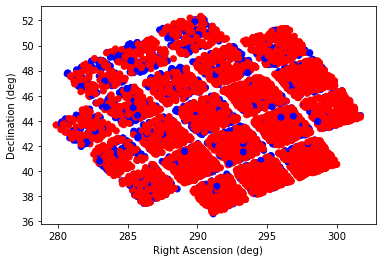

In [11]:
#location of the Exoplanets
disposition = list(df['koi_disposition'])
color = []
for result in disposition:
    if result == 'FALSE POSITIVE':
        color.append('r')
    else:
        color.append('b')
fig,ax = plt.subplots()
ax.scatter(df['ra'],df['dec'],color=color,label=disposition)
plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')

Above is the locations of the exoplanets from the data. The blue one is exoplanets, the red one is not. We can see that most exoplanets tend to be located on the left, but it is still dispersed randomly towards the right.

Text(0, 0.5, 'Duration')

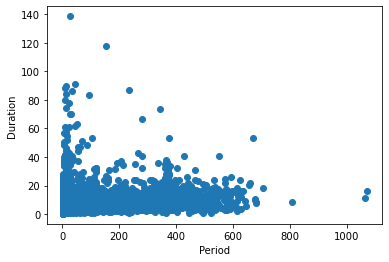

In [12]:
#Period and Duration
fig,ax = plt.subplots()
ax.scatter(df['koi_period'],df['koi_duration'])
plt.xlabel('Period')
plt.ylabel('Duration')

We can see that most of the planets in the data do not have that large of a duration.

Text(0, 0.5, 'Equilibrium Temperature')

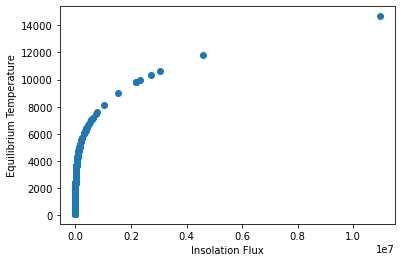

In [13]:
#Insol and Teq
fig,ax = plt.subplots()
ax.scatter(df['koi_insol'],df['koi_teq'])
plt.xlabel('Insolation Flux')
plt.ylabel('Equilibrium Temperature')

We can see that there is a pattern between the equilibrium temperature and the insulation flux. It looks like a quadratic equation that can be modelled and there is a correlation between these two variables.

## 4. Data Preprocessing

Since many of the datas have different null values, thus we need to delete the columns that have different null values that the label column which is the "koi_disposition".

In [14]:
df = df.drop(columns = [
    'rowid',
    'kepid',
    'kepoi_name',
    'kepler_name',
    'koi_score',
    'koi_impact',
    'koi_depth',
    'koi_prad',
    'koi_teq',
    'koi_insol',
    'koi_model_snr',
    'koi_tce_plnt_num',
    'koi_tce_delivname',
    'koi_steff',
    'koi_slogg',
    'koi_srad',
    'koi_kepmag'
])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7316 entries, 0 to 9563
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   koi_disposition  7316 non-null   object 
 1   koi_fpflag_nt    7316 non-null   int64  
 2   koi_fpflag_ss    7316 non-null   int64  
 3   koi_fpflag_co    7316 non-null   int64  
 4   koi_fpflag_ec    7316 non-null   int64  
 5   koi_period       7316 non-null   float64
 6   koi_time0bk      7316 non-null   float64
 7   koi_duration     7316 non-null   float64
 8   ra               7316 non-null   float64
 9   dec              7316 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 628.7+ KB


Above is the final dataset that will be used for training. it consists of only 9 features. The next step would be to scale the data by normalizing them to a range of 0 to 1.

In [16]:
#Feature centering and scaling
from sklearn.preprocessing import Normalizer

norm_scaler = Normalizer()

columns = list(df.columns)
columns.remove('koi_disposition')

df[columns] = norm_scaler.fit_transform(df[columns])

Other than scaling, we need to also encode the data of the label, to 1 or 0.

In [17]:
#Encoding
for index in df.index:
    if df.loc[index,'koi_disposition']=='CONFIRMED':
        df.loc[index,'koi_disposition'] = 1
    else:
        df.loc[index,'koi_disposition'] = 0

## 5. Model Development

When modelling the machine learning model, we are using the K - nearest neighbors algorithm. This can be done with the help of sklearn library.

In [19]:
#Import library
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Creating the feature and label variable
x = df.drop(['koi_fpflag_nt',
             'koi_fpflag_ss',
             'koi_fpflag_co',
             'koi_fpflag_ec',
             'koi_period',
             'koi_time0bk',
             'koi_duration',
             'ra',
             'dec'
            ], axis=1)
y = df["koi_disposition"]
y = y.astype('int')

#Splitting the data to train and test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                   random_state = 10)

In [20]:
neigh = KNeighborsClassifier(n_neighbors=20,weights="uniform")
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

## 6. Model Test

After the model has been made and trained, we need to test out the model whether it has the accuracy that we need.

In [21]:
y_predict = neigh.predict(x_test)

In [22]:
result = pd.DataFrame(x_test.index)
result["koi_disposition"] = y_predict

result.head()

,0,koi_disposition
0,5218,0
1,3125,0
2,2654,0
3,6067,0
4,91,1


As we can see, the model already outputs predictions of 1s or 0s.

In [23]:
result["koi_disposition"].value_counts()

0    1013
1     451
Name: koi_disposition, dtype: int64

In [24]:
accuracy_score(y_test,y_predict)

1.0

It turns out that the model actually has a very accurate prediction of 100% !